## **SUHASH REDDY IMMAREDDY  -  45693242  -  DATA-SCIENCE  -  PORTFOLIO-2**

In [1]:
import os

In [2]:
os.chdir("Appliances-energy-prediction-data")

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from datetime import datetime
from datetime import timedelta
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

## reading the data and understanding the the structure

In [4]:
edc = pd.read_csv('energydata_complete.csv')

In [5]:
edc.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [6]:
edc.shape

(19735, 29)

In [7]:
edc.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [8]:
edc.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [9]:
edc.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

### Data exploration - we try to add some new columns for better understandings

In [10]:
edc1 = edc  # just making sure that we do have a backup file of the original one

In [11]:
edc1['date'] = pd.to_datetime(edc1['date'])

In [12]:
len(edc1)

19735

In [13]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
month   = []
hours   = []
week    = [] 
Day     = []

for i in range (len(edc1)):
   
    month.append(edc1['date'][i].month_name())
    hours.append(edc1['date'][i])
    week.append(edc1['date'][i].week)
    Day.append(edc1['date'][i].dayofweek)

In [14]:
a = set(month)

In [15]:
a

{'April', 'February', 'January', 'March', 'May'}

In [16]:
#Convert to Series

A=pd.Series(month)
B=pd.Series(hours).dt.floor("H") #floor the hour
C=pd.Series(week)
D=pd.Series(Day)

#adding the series to the dataframe            
edc1['Month']=A            
edc1['Hour']=B            
edc1['week']=C                 
edc1['Day']=D
edc1['Time'] = edc1.Hour.dt.hour

In [17]:
edc1.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'Month', 'Hour', 'week', 'Day',
       'Time'],
      dtype='object')

In [18]:
edc1.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...  Windspeed  Visibility  Tdewpoint  \
0  19.79  44.730000  19.000000  ...   7.000000   63.000000        5.3   
1  19.79  44.790000  19.000000  ...   6.666667   59.166667        5.2   
2  19.79  44.933333  18.926667  ...   6.333333   55.333333        5.1   
3  19.79  45.000000  18.890000  ...   6.000000   51.500000        5.0   
4  19.79  45.000000  18.890000  ...   5.666667   47.666667        4.9   

         rv1        rv2    Month                Hour  week  Day  Time  
0  13.275433  13.275433  January 2016-01-11 17:00:00     2    0    17  
1  18.606195  18.606195  January 2016-01-11 17:00:00     2    0    17  
2  28.642668  28.642668  January 2016-01-11 17:00:00     2    0    17  
3  45.410389  45.410389  January 2016-01-11 17:00:00     2    0    17  
4  10.084097  10.084097  January 2016-01-11 17:00:00     2    0    17  

[5 rows x 34 columns]

In [19]:
edc1.shape

(19735, 34)

In [20]:
b = set(Day)

In [21]:
b

{0, 1, 2, 3, 4, 5, 6}

#### 0 is Monday, 1 is tuesday, 2 is wednesday, 3 is thursday, 4 is friday, 5 is saturday, 6 is sunday

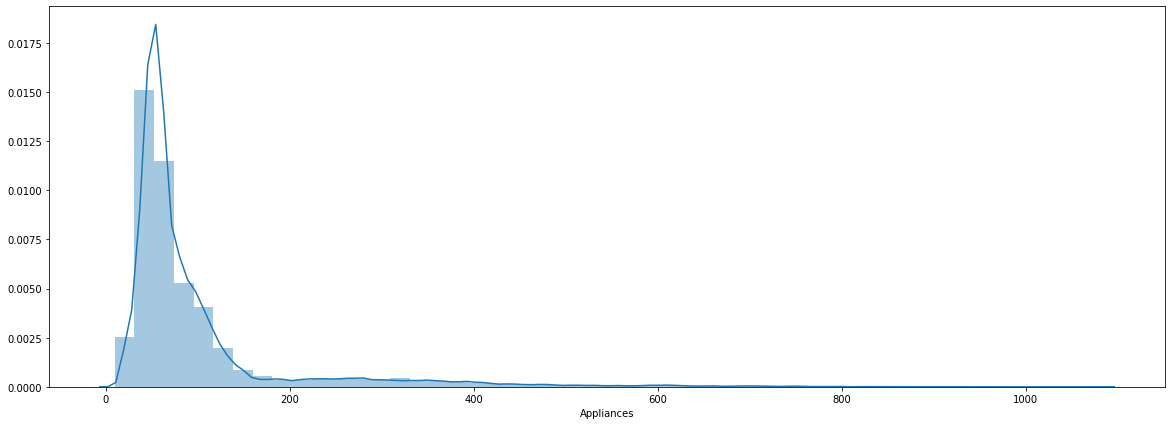

In [22]:
plt.figure(figsize=(20, 7))
sns.distplot(edc1.Appliances)

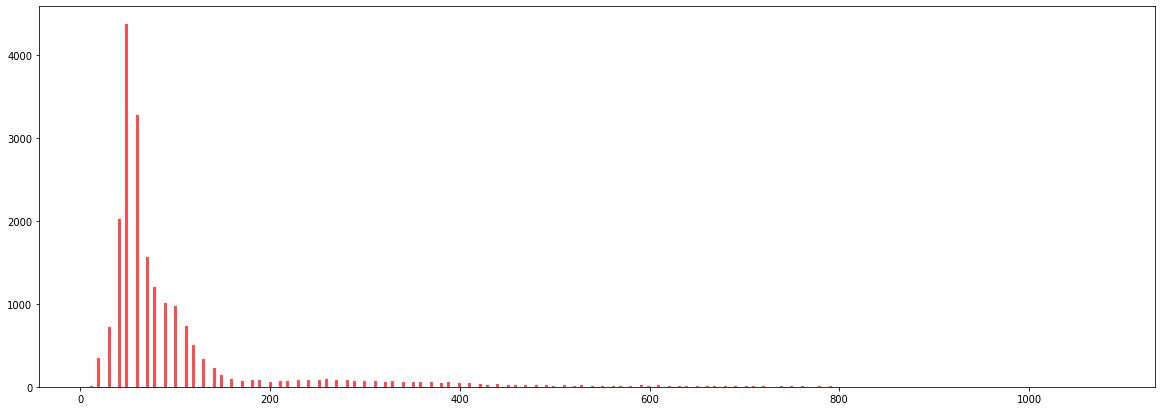

In [23]:
plt.figure(figsize=(20, 7))
plt.hist(edc1["Appliances"], bins='auto', color='#ff0000', alpha=0.7, rwidth=0.85)
plt.show()

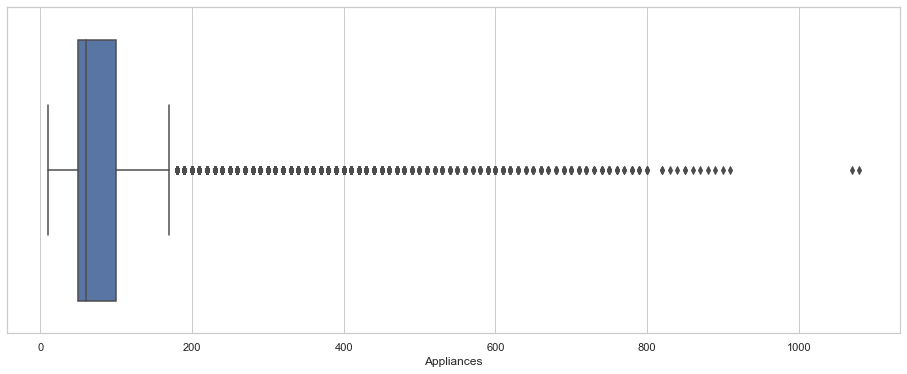

In [24]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
sns.boxplot(edc1["Appliances"])

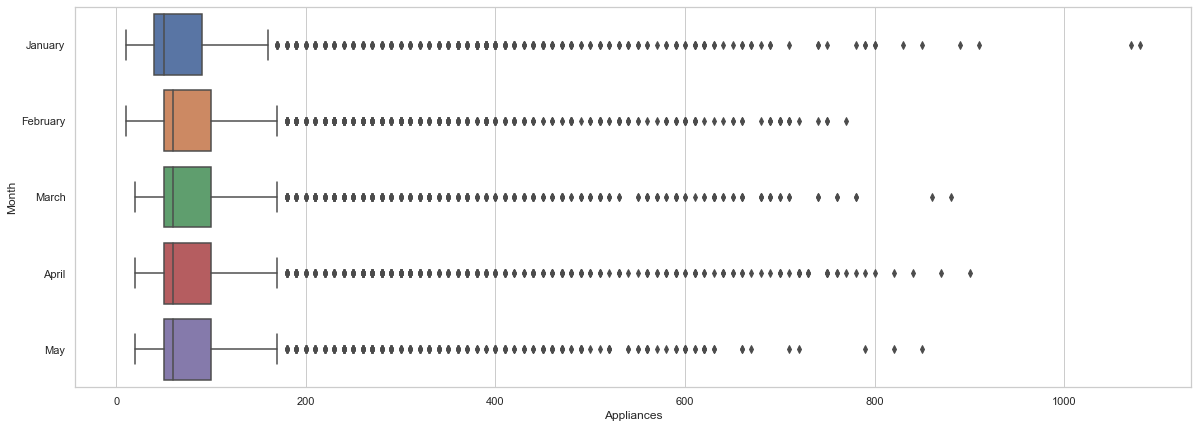

In [25]:
# box plot of Appliances energy Consuption, grouped by month
plt.figure(figsize=(20, 7))
sns.boxplot(x="Appliances", y="Month", data=edc1)

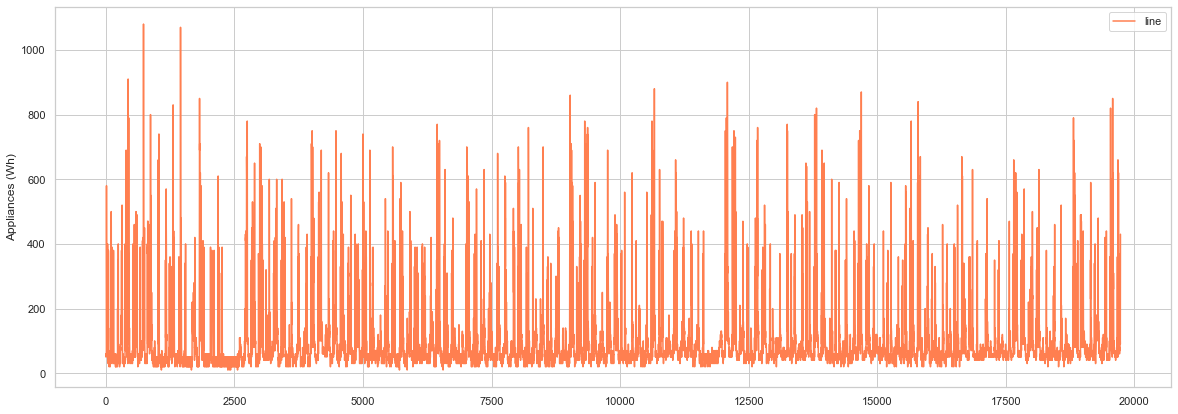

In [26]:
plt.figure(figsize=(20, 7))
ax1 = sns.lineplot(data=edc1["Appliances"], color="coral", label="line")
ax1.set_ylabel('Appliances (Wh)');

(array([735985., 735995., 736016., 736024., 736045., 736055., 736076.,
        736085., 736106., 736116.]), <a list of 10 Text xticklabel objects>)

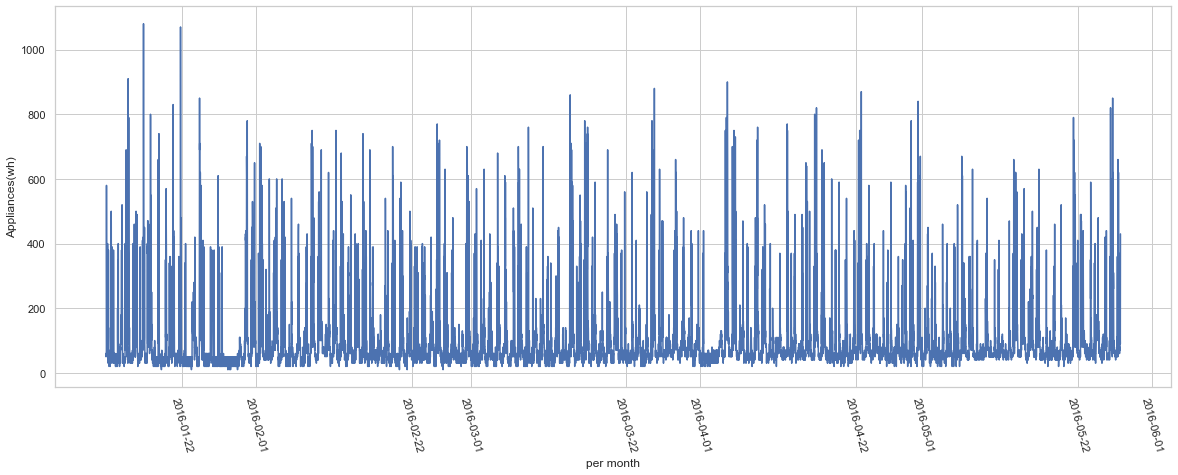

In [27]:
plt.figure(figsize=(20, 7))
plt.ylabel('Appliances(wh)')
plt.xlabel('per month')

plt.plot(edc1.date,edc1.Appliances)
plt.xticks(rotation = -75)

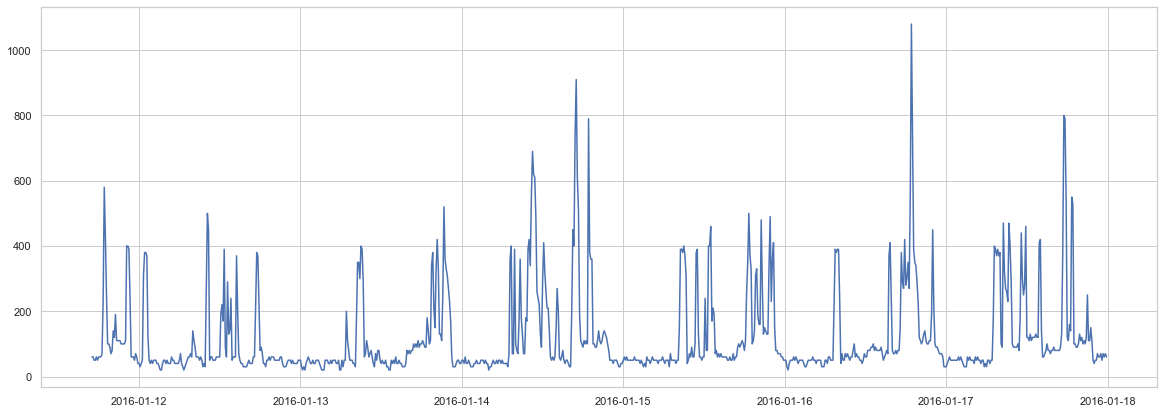

In [28]:
week = edc1["date"].dt.week
first_week = edc1[week == min(week)]
first_week
plt.figure(figsize=(20,7))
plt.plot(first_week['date'],first_week['Appliances'])


### Now we try to represent Hourly energy consumption of appliances in heat map for four consecutive weeks[Week3,Week4,Week5,Week6]

In [44]:
energy1=pd.DataFrame() # making a new dataframe and appending alll required feilds to it that are required for the heat map
energy2 =edc1.groupby('Hour',as_index=False).agg({"Appliances": "sum"})

In [45]:
energy2.head()

Hour  Appliances
0 2016-01-11 17:00:00         330
1 2016-01-11 18:00:00        1060
2 2016-01-11 19:00:00        1040
3 2016-01-11 20:00:00         750
4 2016-01-11 21:00:00         620

In [46]:
energy1['Hour'] = edc1['Hour']
energy1['week'] = edc1['week']
energy1['Day']  = edc1['Day']
energy1['Time'] = edc1['Time']

In [47]:
energy1.head()

Hour  week  Day  Time
0 2016-01-11 17:00:00     2    0    17
1 2016-01-11 17:00:00     2    0    17
2 2016-01-11 17:00:00     2    0    17
3 2016-01-11 17:00:00     2    0    17
4 2016-01-11 17:00:00     2    0    17

In [48]:
energy3 =energy1.groupby('Hour',as_index=False).first()

In [49]:
energy3.head()

Hour  week  Day  Time
0 2016-01-11 17:00:00     2    0    17
1 2016-01-11 18:00:00     2    0    18
2 2016-01-11 19:00:00     2    0    19
3 2016-01-11 20:00:00     2    0    20
4 2016-01-11 21:00:00     2    0    21

In [50]:
energy1=pd.merge(energy3,energy2)

In [51]:
energy1.head()

Hour  week  Day  Time  Appliances
0 2016-01-11 17:00:00     2    0    17         330
1 2016-01-11 18:00:00     2    0    18        1060
2 2016-01-11 19:00:00     2    0    19        1040
3 2016-01-11 20:00:00     2    0    20         750
4 2016-01-11 21:00:00     2    0    21         620

In [37]:
week3=energy1[energy1.week == 3]
week3 = week3.drop(['Hour', 'week'], axis=1) #selecting only the required columns

In [38]:
week3.head()

Day  Time  Appliances
151    0     0         270
152    0     1         260
153    0     2         260
154    0     3         250
155    0     4         270

In [39]:
week3 = week3.pivot("Time","Day","Appliances")

week4=energy1[energy1.week == 4]
week4 = week4.drop(['Hour', 'week'], axis=1) 
week4 = week4.pivot("Time","Day","Appliances") 

week5=energy1[energy1.week == 5]
week5 = week5.drop(['Hour', 'week'], axis=1) 
week5 = week5.pivot("Time","Day","Appliances")  

week6=energy1[energy1.week == 6]
week6 = week6.drop(['Hour', 'week'], axis=1)
week6 = week6.pivot("Time","Day","Appliances") 

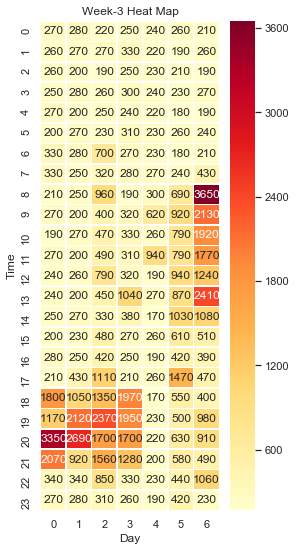

In [40]:
plt.figure(figsize=(4, 9))
plt.title("Week-3 Heat Map")
ax = sns.heatmap(week3,cmap = "YlOrRd",annot=True, fmt="d", linewidths=.5)

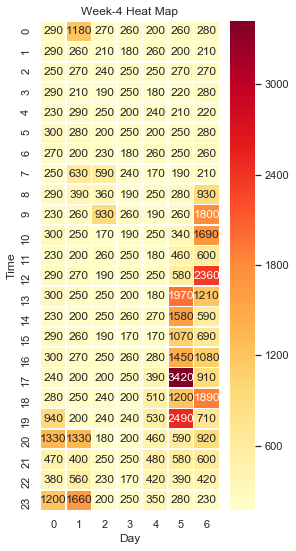

In [41]:
plt.figure(figsize=(4, 9))
plt.title("Week-4 Heat Map")
ax = sns.heatmap(week4,cmap = "YlOrRd",annot=True, fmt="d", linewidths=.5)

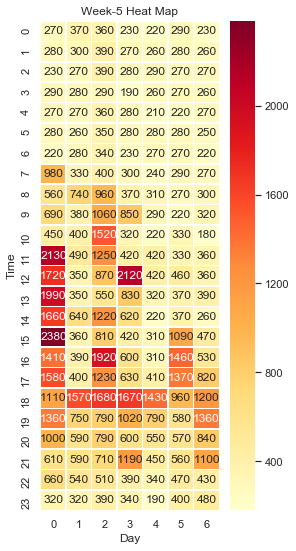

In [42]:
plt.figure(figsize=(4, 9))
plt.title("Week-5 Heat Map")
ax = sns.heatmap(week5,cmap = "YlOrRd",annot=True, fmt="d", linewidths=.5)

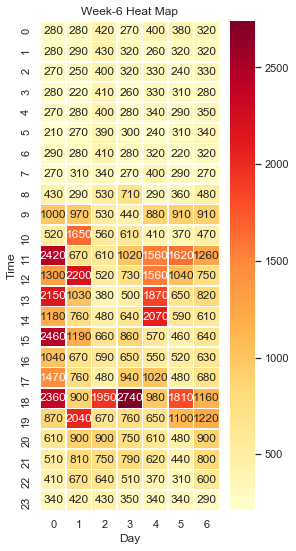

In [43]:
plt.figure(figsize=(4, 9))
plt.title("Week-6 Heat Map")
ax = sns.heatmap(week6,cmap = "YlOrRd",annot=True, fmt="d", linewidths=.5)

### In the research Paper they did the heat map on top of the training data but i had done it on the total data

In [51]:
edc1.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'Month', 'Hour', 'week', 'Day',
       'Time'],
      dtype='object')

In [52]:
## each variable distribution and the correlation value with respect appliances is given below

In [53]:
def corr(x, y, **kwargs):
    coef = np.corrcoef(x, y)[0][1]
    label = r'$\rho$ = ' + str(round(coef, 2))
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

In [54]:
ss = edc1[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3','RH_3' ]]

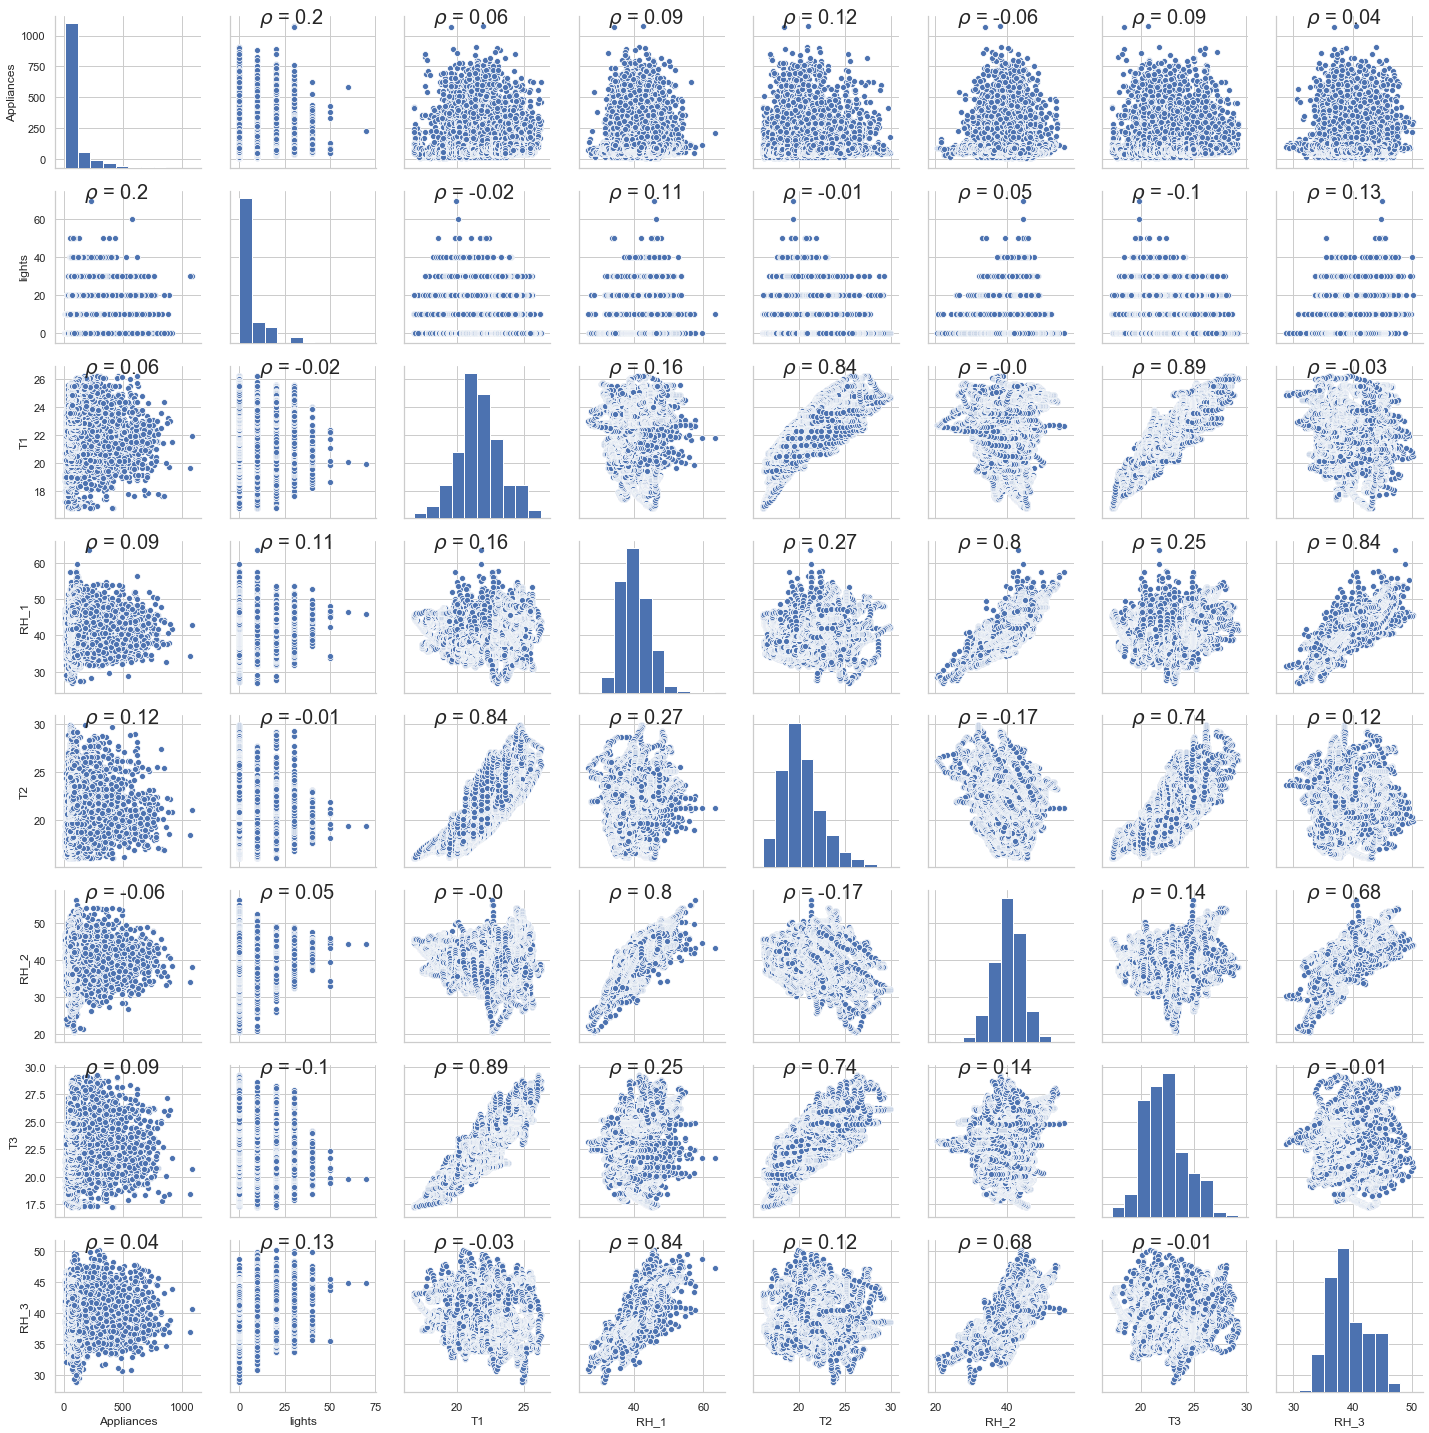

In [55]:
g = sns.pairplot(ss)
g.map_lower(corr)
g.map_upper(corr)
plt.show()

In [56]:
ss1 = edc1[['Appliances','T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7']]

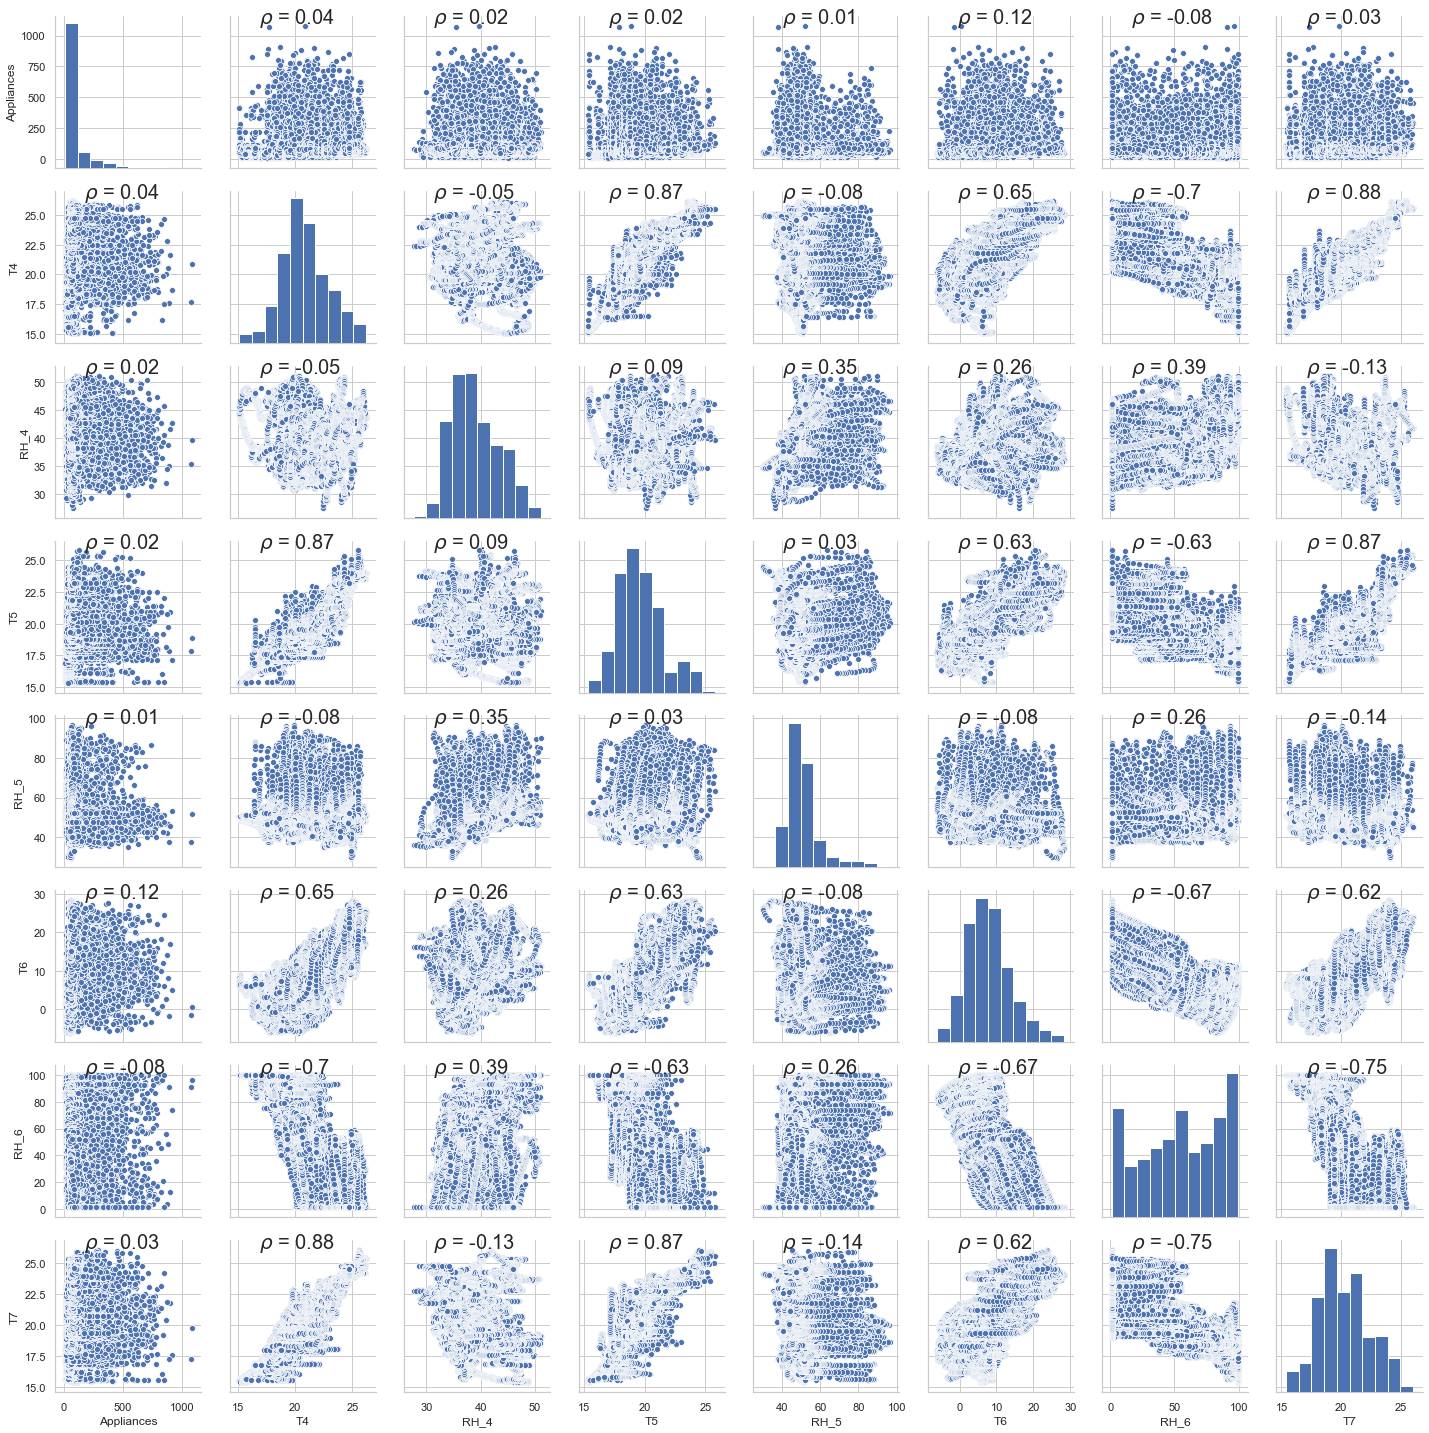

In [57]:
g = sns.pairplot(ss1)
g.map_lower(corr)
g.map_upper(corr)
plt.show()

In [58]:
ss2 = edc1[['Appliances','RH_7', 'T8','RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg']]

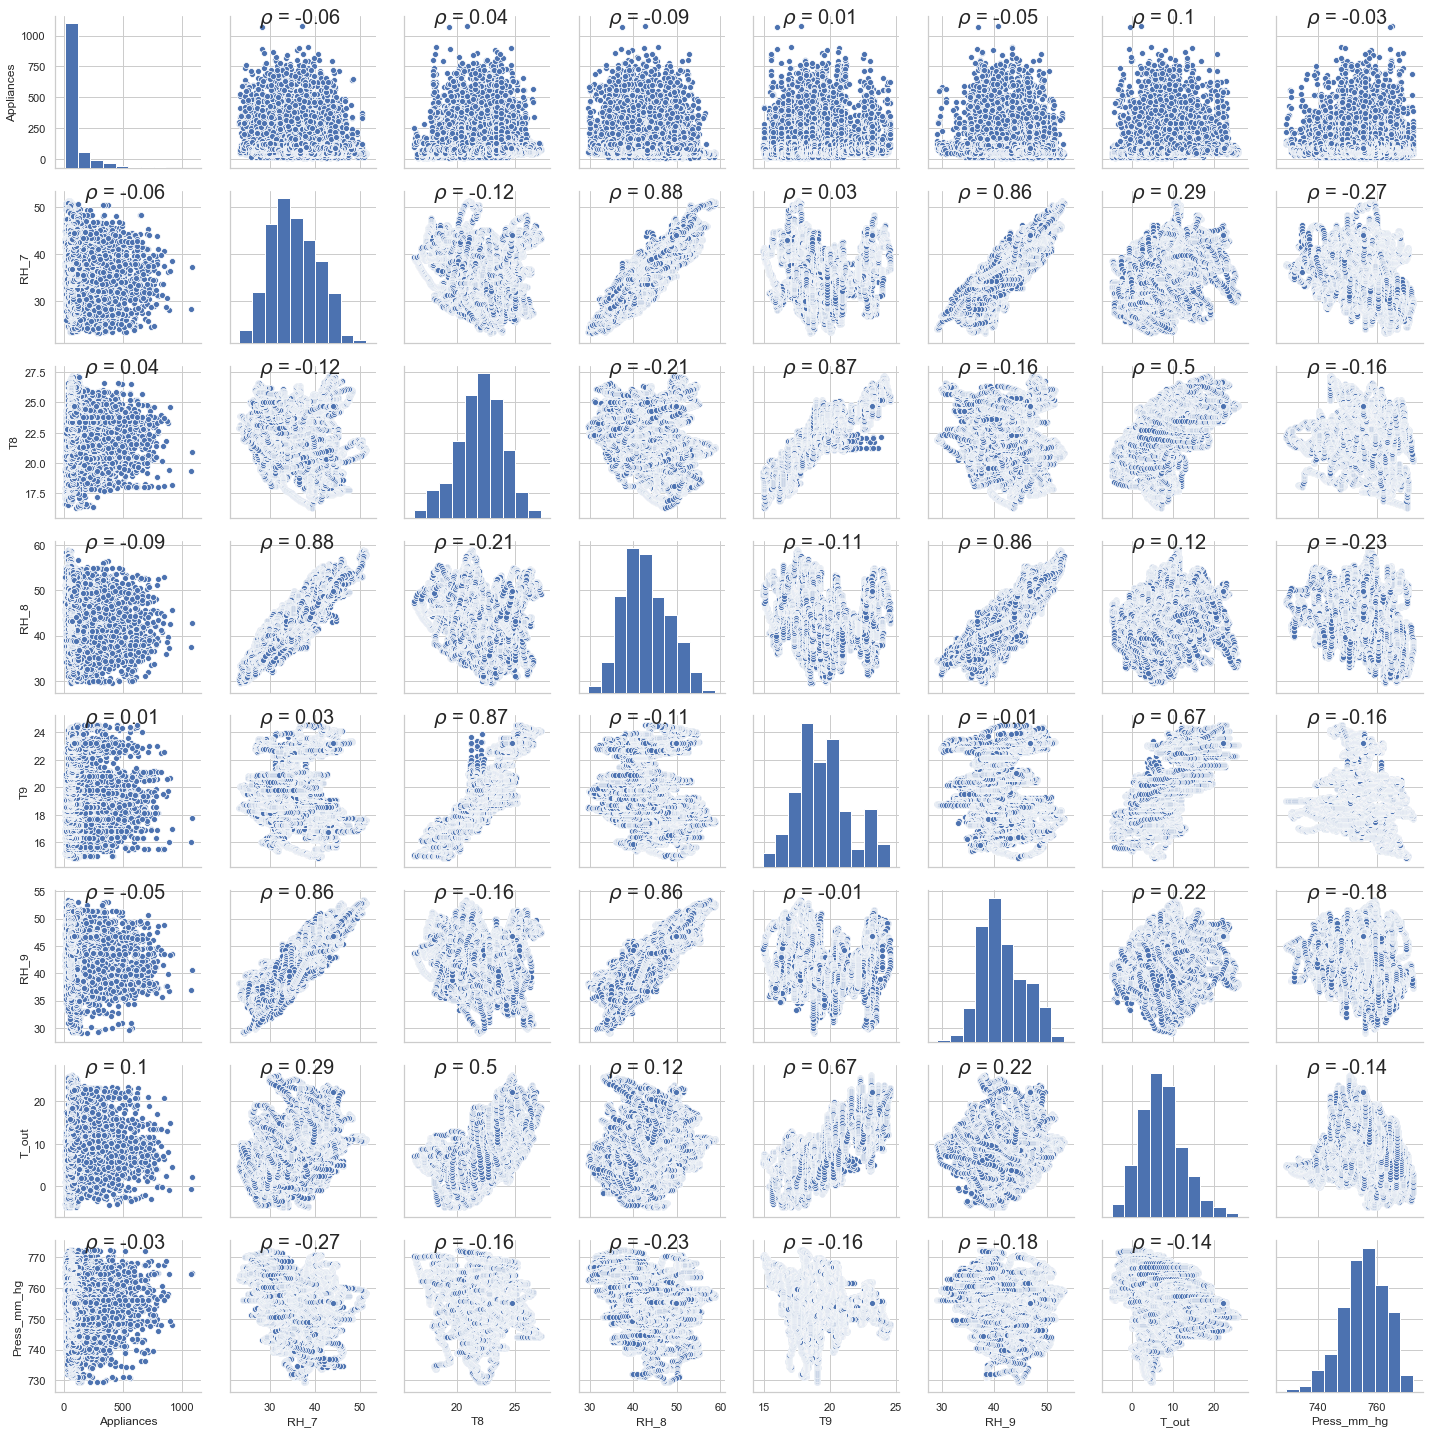

In [59]:
g = sns.pairplot(ss2)
g.map_lower(corr)
g.map_upper(corr)
plt.show()

In [60]:
ss3 = edc1[['Appliances','RH_out', 'Windspeed','Visibility', 'Tdewpoint', 'rv1', 'rv2']]

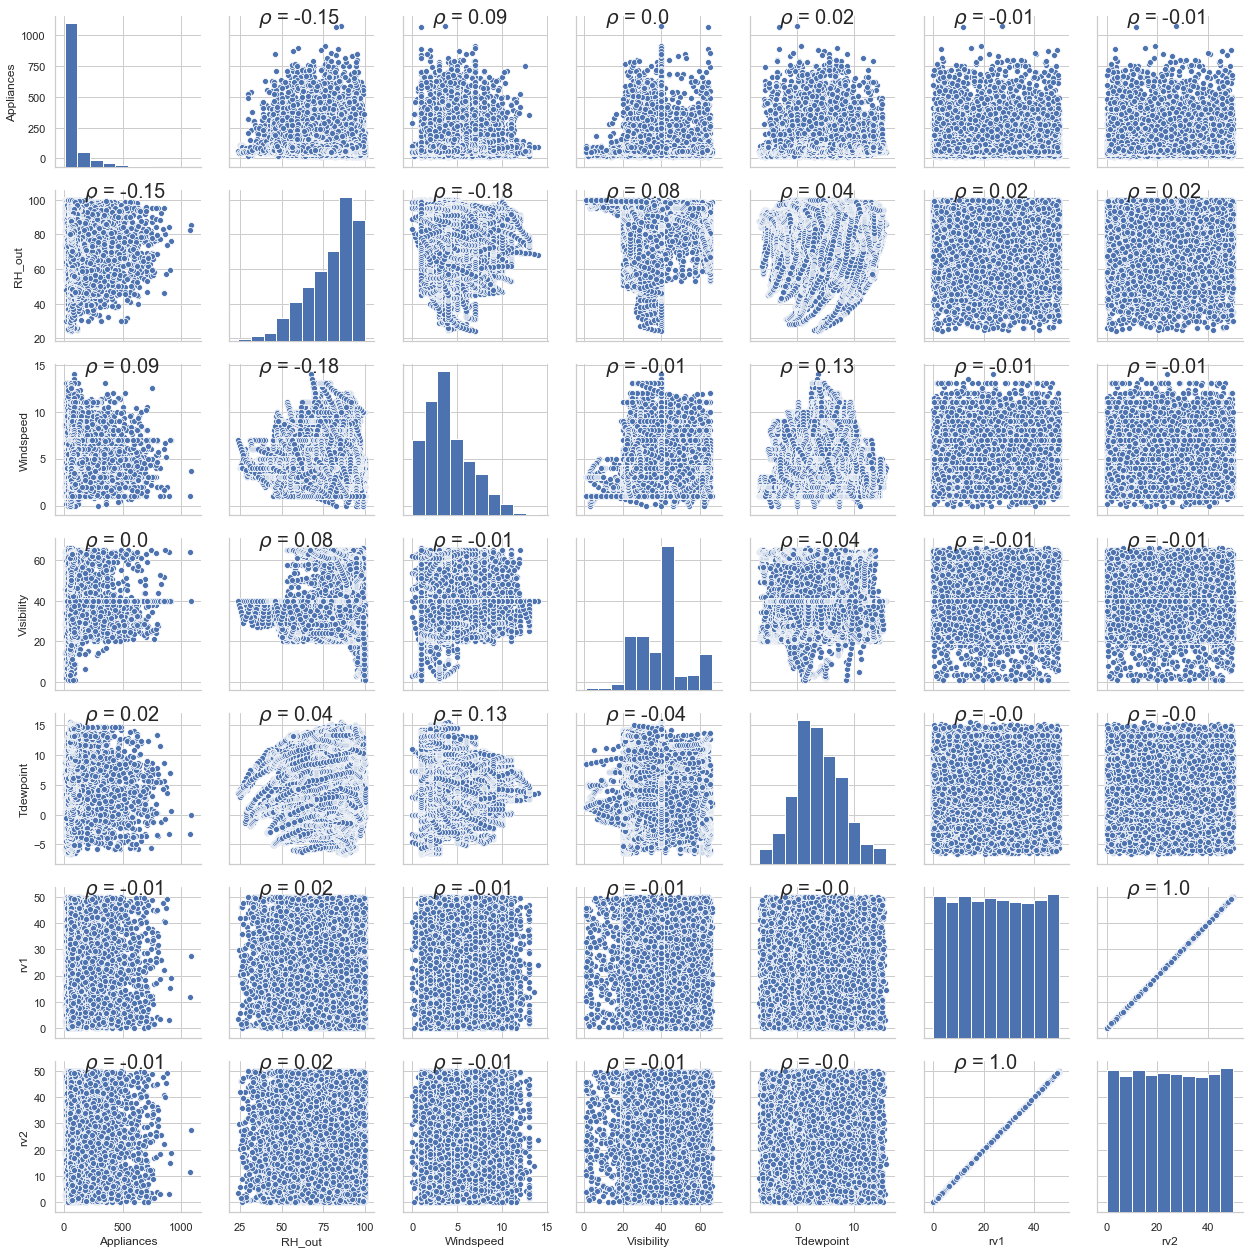

In [61]:
g = sns.pairplot(ss3)
g.map_lower(corr)
g.map_upper(corr)
plt.show()

In [62]:
# model validation

In [52]:
train = pd.read_csv('training.csv', index_col='date', parse_dates=True)

In [53]:
test = pd.read_csv('testing.csv', index_col='date', parse_dates=True)

In [54]:
train = train.join(pd.get_dummies(train['Day_of_week']))
train.head()

Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   
2016-01-11 17:50:00          50      40  19.89  46.026667  19.2  44.500000   

                        T3       RH_3         T4       RH_4  ...    NSM  \
date                                                         ...          
2016-01-11 17:00:00  19.79  44.730000  19.000000  45.566667  ...  61200   
2016-01-11 17:10:00  19.79  44.790000  19.000000  45.992500  ...  61800   
2016-01-11 17:20:00  19.79  44.933333  18.926667  45.890000  ...  62400   
2016-01-11 17:40:00  19.79  45.000000  18.890000  45.530000  ...  63600   
2016-01-11 17:50:00  19.79  44.933333  18.890000  45.730000  ...  64200   

                     WeekStatus  Day_of_week  Friday  Monday  Saturday  \
date                                                                     
2016-01-11 17:00:00     Weekday       Monday       0       1         0   
2016-01-11 17:10:00     Weekday       Monday       0       1         0   
2016-01-11 17:20:00     Weekday       Monday       0       1         0   
2016-01-11 17:40:00     Weekday       Monday       0       1         0   
2016-01-11 17:50:00     Weekday       Monday       0       1         0   

                     Sunday  Thursday  Tuesday  Wednesday  
date                                                       
2016-01-11 17:00:00       0         0        0          0  
2016-01-11 17:10:00       0         0        0          0  
2016-01-11 17:20:00       0         0        0          0  
2016-01-11 17:40:00       0         0        0          0  
2016-01-11 17:50:00       0         0        0          0  

[5 rows x 38 columns]

In [55]:
train = train.join(pd.get_dummies(train['WeekStatus']))
train.head()

Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   
2016-01-11 17:50:00          50      40  19.89  46.026667  19.2  44.500000   

                        T3       RH_3         T4       RH_4  ...  Day_of_week  \
date                                                         ...                
2016-01-11 17:00:00  19.79  44.730000  19.000000  45.566667  ...       Monday   
2016-01-11 17:10:00  19.79  44.790000  19.000000  45.992500  ...       Monday   
2016-01-11 17:20:00  19.79  44.933333  18.926667  45.890000  ...       Monday   
2016-01-11 17:40:00  19.79  45.000000  18.890000  45.530000  ...       Monday   
2016-01-11 17:50:00  19.79  44.933333  18.890000  45.730000  ...       Monday   

                     Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
date                                                                       
2016-01-11 17:00:00       0       1         0       0         0        0   
2016-01-11 17:10:00       0       1         0       0         0        0   
2016-01-11 17:20:00       0       1         0       0         0        0   
2016-01-11 17:40:00       0       1         0       0         0        0   
2016-01-11 17:50:00       0       1         0       0         0        0   

                     Wednesday  Weekday  Weekend  
date                                              
2016-01-11 17:00:00          0        1        0  
2016-01-11 17:10:00          0        1        0  
2016-01-11 17:20:00          0        1        0  
2016-01-11 17:40:00          0        1        0  
2016-01-11 17:50:00          0        1        0  

[5 rows x 40 columns]

In [56]:
test = test.join(pd.get_dummies(test['Day_of_week']))
test.head()

Appliances  lights         T1       RH_1         T2  \
date                                                                       
2016-01-11 17:30:00          50      40  19.890000  46.066667  19.200000   
2016-01-11 18:00:00          60      50  19.890000  45.766667  19.200000   
2016-01-11 18:40:00         230      70  19.926667  45.863333  19.356667   
2016-01-11 18:50:00         580      60  20.066667  46.396667  19.426667   
2016-01-11 19:30:00         100      10  20.566667  53.893333  20.033333   

                          RH_2     T3       RH_3     T4       RH_4  ...  \
date                                                                ...   
2016-01-11 17:30:00  44.590000  19.79  45.000000  18.89  45.723333  ...   
2016-01-11 18:00:00  44.500000  19.79  44.900000  18.89  45.790000  ...   
2016-01-11 18:40:00  44.400000  19.79  44.900000  18.89  46.430000  ...   
2016-01-11 18:50:00  44.400000  19.79  44.826667  19.00  46.430000  ...   
2016-01-11 19:30:00  46.756667  20.10  48.466667  19.00  48.490000  ...   

                       NSM  WeekStatus  Day_of_week  Friday  Monday  Saturday  \
date                                                                            
2016-01-11 17:30:00  63000     Weekday       Monday       0       1         0   
2016-01-11 18:00:00  64800     Weekday       Monday       0       1         0   
2016-01-11 18:40:00  67200     Weekday       Monday       0       1         0   
2016-01-11 18:50:00  67800     Weekday       Monday       0       1         0   
2016-01-11 19:30:00  70200     Weekday       Monday       0       1         0   

                     Sunday  Thursday  Tuesday  Wednesday  
date                                                       
2016-01-11 17:30:00       0         0        0          0  
2016-01-11 18:00:00       0         0        0          0  
2016-01-11 18:40:00       0         0        0          0  
2016-01-11 18:50:00       0         0        0          0  
2016-01-11 19:30:00       0         0        0          0  

[5 rows x 38 columns]

In [57]:
test = test.join(pd.get_dummies(test['WeekStatus']))
test.head()

Appliances  lights         T1       RH_1         T2  \
date                                                                       
2016-01-11 17:30:00          50      40  19.890000  46.066667  19.200000   
2016-01-11 18:00:00          60      50  19.890000  45.766667  19.200000   
2016-01-11 18:40:00         230      70  19.926667  45.863333  19.356667   
2016-01-11 18:50:00         580      60  20.066667  46.396667  19.426667   
2016-01-11 19:30:00         100      10  20.566667  53.893333  20.033333   

                          RH_2     T3       RH_3     T4       RH_4  ...  \
date                                                                ...   
2016-01-11 17:30:00  44.590000  19.79  45.000000  18.89  45.723333  ...   
2016-01-11 18:00:00  44.500000  19.79  44.900000  18.89  45.790000  ...   
2016-01-11 18:40:00  44.400000  19.79  44.900000  18.89  46.430000  ...   
2016-01-11 18:50:00  44.400000  19.79  44.826667  19.00  46.430000  ...   
2016-01-11 19:30:00  46.756667  20.10  48.466667  19.00  48.490000  ...   

                     Day_of_week  Friday  Monday  Saturday  Sunday  Thursday  \
date                                                                           
2016-01-11 17:30:00       Monday       0       1         0       0         0   
2016-01-11 18:00:00       Monday       0       1         0       0         0   
2016-01-11 18:40:00       Monday       0       1         0       0         0   
2016-01-11 18:50:00       Monday       0       1         0       0         0   
2016-01-11 19:30:00       Monday       0       1         0       0         0   

                     Tuesday  Wednesday  Weekday  Weekend  
date                                                       
2016-01-11 17:30:00        0          0        1        0  
2016-01-11 18:00:00        0          0        1        0  
2016-01-11 18:40:00        0          0        1        0  
2016-01-11 18:50:00        0          0        1        0  
2016-01-11 19:30:00        0          0        1        0  

[5 rows x 40 columns]

In [58]:
### traing the dataset with train dataset and validating against test dataset

In [59]:
c = train.columns

In [60]:
c = c.drop(['Day_of_week','WeekStatus','Weekend'])

In [61]:
c

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'NSM', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Weekday'],
      dtype='object')

In [62]:
X_train = train.drop(['Appliances','Day_of_week','WeekStatus'], axis = 1)
Y_train = train['Appliances']
X_test = test.drop(['Appliances','Day_of_week','WeekStatus'], axis = 1)
Y_test = test['Appliances']
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(14803, 37)
(14803,)
(4932, 37)
(4932,)


In [63]:
### Fitting the linear model 

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
def mean_absolute_percentage_error1(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [66]:
import math
Y_pred = model.predict(X_test)
print("r2 for test data is",r2_score(Y_test, Y_pred))
print("MSE for test data is",mean_squared_error(Y_test, Y_pred))
print("RMSE for test data is",math.sqrt(mean_squared_error(Y_test, Y_pred)))
print("MAE for test data is",mean_absolute_error(Y_test, Y_pred))
print("MAPE for test data is",mean_absolute_percentage_error1(Y_test, model.predict(X_test)))

r2 for test data is 0.15900712778677029
MSE for test data is 8681.847902503212
RMSE for test data is 93.17643426587654
MAE for test data is 51.984929609383876
MAPE for test data is 59.955125611475204


Text(0, 0.5, 'residuals')

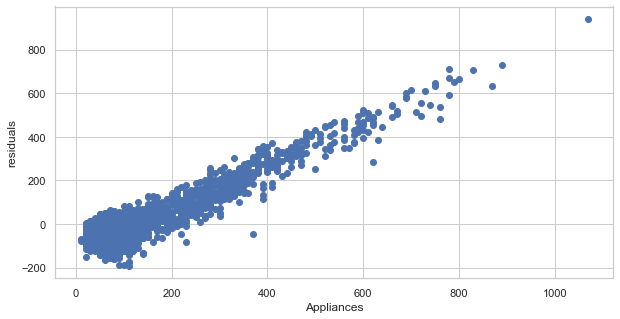

In [81]:
residuals = Y_test - Y_pred
plt.figure(figsize = (10,5))
plt.scatter(test.Appliances,residuals)
plt.xlabel("Appliances")
plt.ylabel("residuals")

In [69]:
Y_pred1 = model.predict(X_train)
print("r2 for train data is",r2_score(Y_train, Y_pred1))
print("MSE for train data is",mean_squared_error(Y_train, Y_pred1))
print("RMSE for train data is",math.sqrt(mean_squared_error(Y_train, Y_pred1)))
print("MAE for train data is",mean_absolute_error(Y_train, Y_pred1))
print("MAPE for train data is",mean_absolute_percentage_error1(Y_train, model.predict(X_train)))

r2 for train data is 0.17834376492372517
MSE for train data is 8687.278741530838
RMSE for train data is 93.20557248110671
MAE for train data is 53.138912335056666
MAPE for train data is 61.331174880927406


In [70]:
## Fitting the RFE

In [77]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

estimator = LinearRegression()
selector = RFE(estimator, 30, step=1)
selector = selector.fit(X_train, Y_train)
y_predict = selector.predict(X_test)


In [78]:
print("r2 for test data is",r2_score(Y_test, y_predict))
print("MSE for test data is",mean_squared_error(Y_test, y_predict))
print("RMSE for test data is",math.sqrt(mean_squared_error(Y_test, y_predict)))
print("MAE for test data is",mean_absolute_error(Y_test, y_predict))
print("MAPE for test data is",mean_absolute_percentage_error1(Y_test, y_predict))

r2 for test data is 0.15613307381972408
MSE for test data is 8711.5177133065
RMSE for test data is 93.33551153396279
MAE for test data is 52.06869745566852
MAPE for test data is 60.02791138825917


Text(0, 0.5, 'residuals')

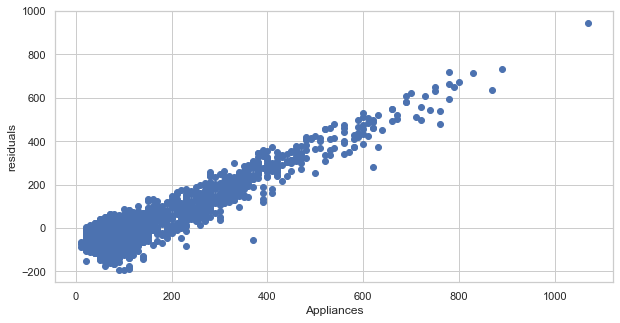

In [80]:
residuals = Y_test - y_predict
plt.figure(figsize = (10,5))
plt.scatter(test.Appliances,residuals)
plt.xlabel("Appliances")
plt.ylabel("residuals")

In [82]:
Y_pred1 = selector.predict(X_train)
print("r2 for train data is",r2_score(Y_train, Y_pred1))
print("MSE for train data is",mean_squared_error(Y_train, Y_pred1))
print("RMSE for train data is",math.sqrt(mean_squared_error(Y_train, Y_pred1)))
print("MAE for train data is",mean_absolute_error(Y_train, Y_pred1))
print("MAPE for train data is",mean_absolute_percentage_error1(Y_train, selector.predict(X_train)))

r2 for train data is 0.17529678426596762
MSE for train data is 8719.494124514618
RMSE for train data is 93.37823153452103
MAE for train data is 53.187024809362434
MAPE for train data is 61.30939132819881


### We are getting the same result when were are using the linear regression and Recursive feature extraction with linear model where the MSE value is very high and r2 square values is low so that we can say that the model is not doing a better job.

In [83]:
## Fitting a Random Forest Regressor

In [84]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [85]:
Y_pred = regressor.predict(X_test)
print("r2 for test data is",r2_score(Y_test, Y_pred))
print("MSE for test data is",mean_squared_error(Y_test, Y_pred))
print("RMSE for test data is",math.sqrt(mean_squared_error(Y_test, Y_pred)))
print("MAE for test data is",mean_absolute_error(Y_test, Y_pred))
print("MAPE for test data is",mean_absolute_percentage_error1(Y_test, model.predict(X_test)))

r2 for test data is 0.5214962710813266
MSE for test data is 4939.7524432279
RMSE for test data is 70.28337245200959
MAE for test data is 32.845965125709654
MAPE for test data is 59.955125611475204


In [86]:
Y_pred1 = regressor.predict(X_train)
print("r2 for train data is",r2_score(Y_train, Y_pred1))
print("MSE for train data is",mean_squared_error(Y_train, Y_pred1))
print("RMSE for train data is",math.sqrt(mean_squared_error(Y_train, Y_pred1)))
print("MAE for train data is",mean_absolute_error(Y_train, Y_pred1))
print("MAPE for train data is",mean_absolute_percentage_error1(Y_train, regressor.predict(X_train)))

r2 for train data is 0.93768409789014
MSE for train data is 658.8590076335878
RMSE for train data is 25.668249017679173
MAE for train data is 12.245862325204351
MAPE for train data is 12.121591425611507


In [100]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

estimator = RandomForestRegressor(n_estimators = 100, random_state = 0)
selector = RFE(estimator, 30, step=1)
selector = selector.fit(X_train, Y_train)
y_predict = selector.predict(X_test)


In [101]:
print("r2 for test data is",r2_score(Y_test, y_predict))
print("MSE for test data is",mean_squared_error(Y_test, y_predict))
print("RMSE for test data is",math.sqrt(mean_squared_error(Y_test, y_predict)))
print("MAE for test data is",mean_absolute_error(Y_test, y_predict))
print("MAPE for test data is",mean_absolute_percentage_error1(Y_test, y_predict))

r2 for test data is 0.5237355901592999
MSE for test data is 4916.635210867802
RMSE for test data is 70.11872225638315
MAE for test data is 32.871086780210874
MAPE for test data is 32.452728767290075


In [102]:
Y_pred1 = selector.predict(X_train)
print("r2 for train data is",r2_score(Y_train, Y_pred1))
print("MSE for train data is",mean_squared_error(Y_train, Y_pred1))
print("RMSE for train data is",math.sqrt(mean_squared_error(Y_train, Y_pred1)))
print("MAE for train data is",mean_absolute_error(Y_train, Y_pred1))
print("MAPE for train data is",mean_absolute_percentage_error1(Y_train, selector.predict(X_train)))

r2 for train data is 0.9379166869598652
MSE for train data is 656.3998696210227
RMSE for train data is 25.620301903393386
MAE for train data is 12.25234749712896
MAPE for train data is 12.114799113807585


### We are getting the same result when were are using the Random Forest and Random forest with Recursive feature extraction where the MSE value is Low and r2 square values is High so that we can say that the model is doing a better job.

### We now try to get the Varible importance for the Random Forest

In [94]:
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [95]:
lr = LinearRegression(normalize=True)
lr.fit(X_train,Y_train)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X_train,Y_train)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), c, order=-1)

Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 fe

In [96]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X_train,Y_train)
ranks["RF"] = ranking(rf.feature_importances_, c);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 50building tree 2 of 50
building tree 3 of 50

building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50

building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s


building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.8s finished


In [97]:
r = {}
for name in c:
    r[name] = round(np.mean([ranks[method][name] for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in c:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	RF	RFE	Mean
Appliances	0.16	0.44	0.3
lights	0.13	0.47	0.3
T1	0.18	1.0	0.59
RH_1	0.14	0.94	0.54
T2	0.25	0.97	0.61
RH_2	0.31	0.92	0.62
T3	0.3	0.72	0.51
RH_3	0.16	0.22	0.19
T4	0.17	0.03	0.1
RH_4	0.14	0.31	0.22
T5	0.22	0.06	0.14
RH_5	0.16	0.69	0.42
T6	0.15	0.14	0.15
RH_6	0.16	0.33	0.24
T7	0.16	0.39	0.28
RH_7	0.22	0.78	0.5
T8	0.16	0.75	0.46
RH_8	0.14	0.83	0.48
T9	0.17	0.28	0.23
RH_9	0.14	0.67	0.4
T_out	0.22	0.08	0.15
Press_mm_hg	0.16	0.25	0.2
RH_out	0.16	0.42	0.29
Windspeed	0.12	0.11	0.12
Visibility	0.14	0.36	0.25
Tdewpoint	0.11	0.17	0.14
rv1	0.1	0.19	0.15
rv2	1.0	0.0	0.5
NSM	0.02	0.81	0.42
Friday	0.02	0.89	0.46
Monday	0.01	0.86	0.44
Saturday	0.0	0.56	0.28
Sunday	0.0	0.61	0.3
Thursday	0.0	0.64	0.32
Tuesday	0.0	0.58	0.29
Wednesday	0.0	0.5	0.25
Weekday	0.0	0.53	0.26


In [98]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

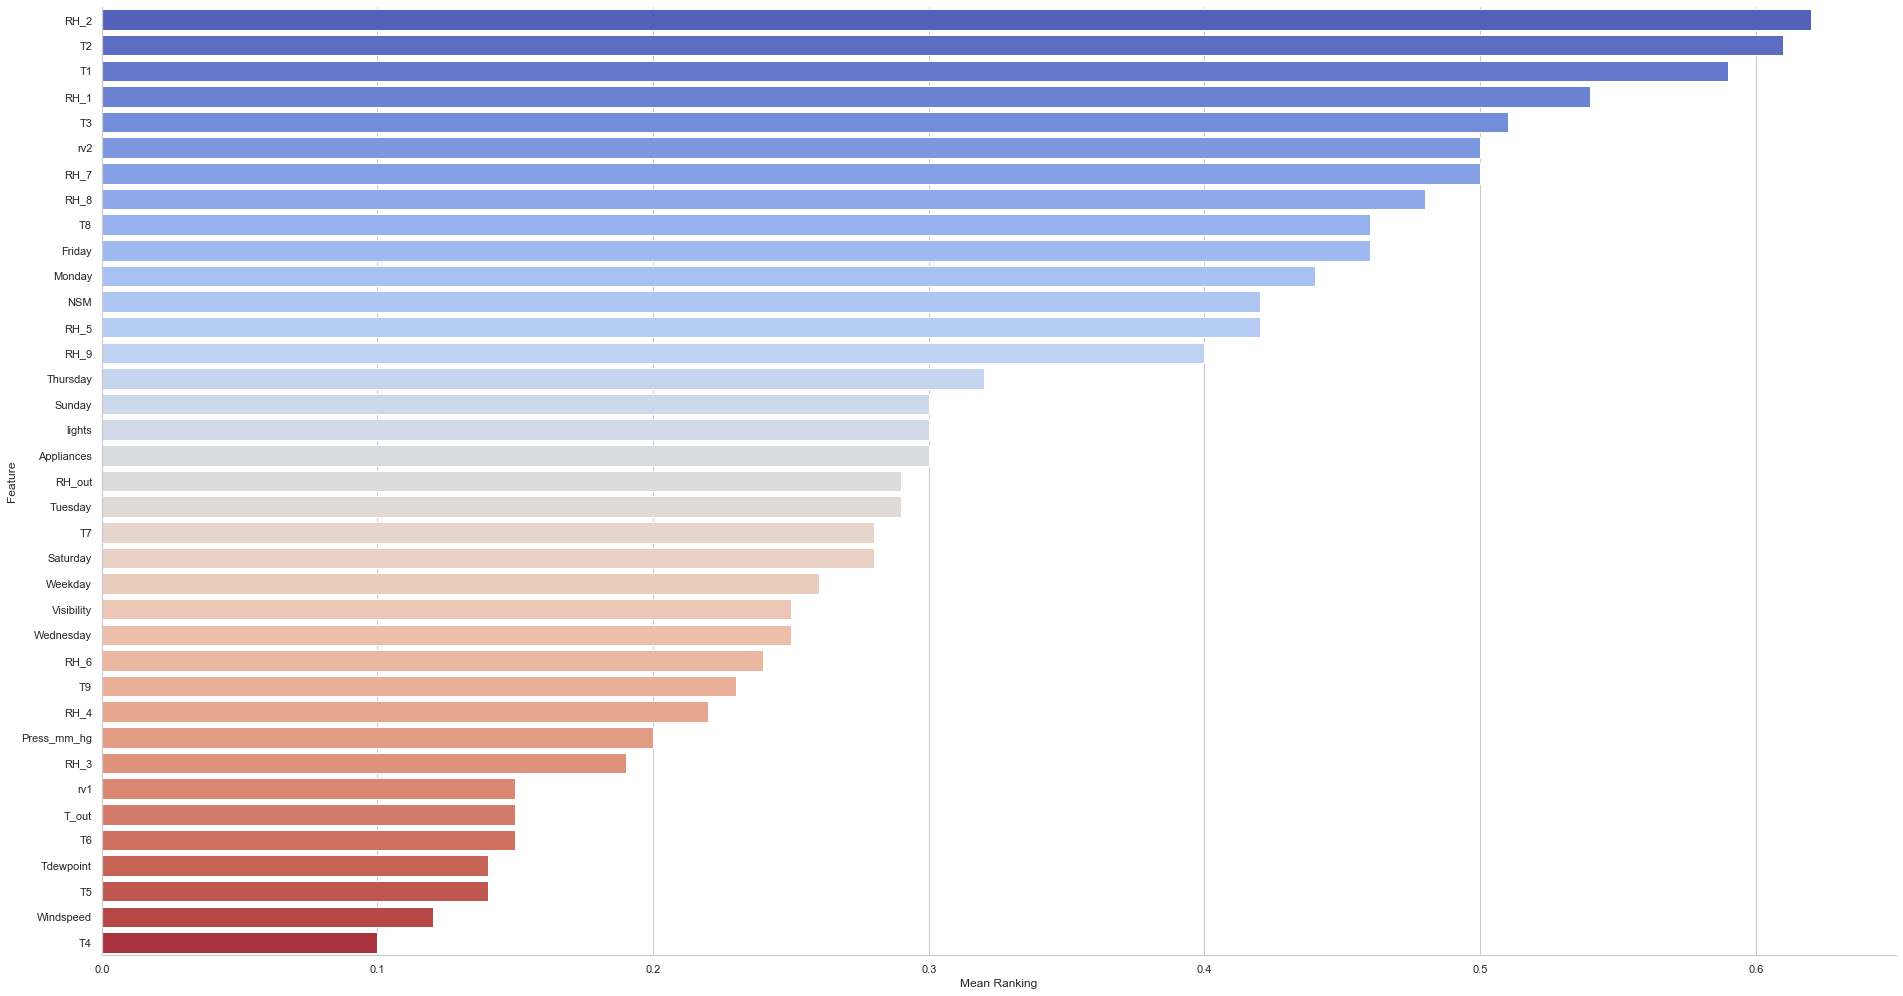

In [99]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')